# Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting up the parameters for the plot

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (5, 3)

# Loading the datasets

In [ ]:
matches_df = pd.read_csv('IPL Matches 2008-2020.csv')
balls_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [ ]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# Optional Processing to extract season

In [ ]:
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

*The dt.year attribute returns an array containing the year value of the DateTime Series Object.So from date we are extracting year to assign it to season.*

In [ ]:
# Changing Rising Pune Supergiant to Rising Pune Supergiants
matches_df['team1'] = matches_df['team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches_df['team2'] = matches_df['team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches_df['toss_winner'] = matches_df['toss_winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches_df['winner'] = matches_df['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
balls_df['batting_team'] = balls_df['batting_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
balls_df['bowling_team'] = balls_df['bowling_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

# Question 1 :

**What was the count of matches played in each season?**

**Solution :**

 We have to count the number of matches per season and sort it in ascending order

In [ ]:
matches_per_season = matches_df['season'].value_counts().sort_index()
matches_per_season.head(15)

,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


# Let's Visualize the count of matches played in each season

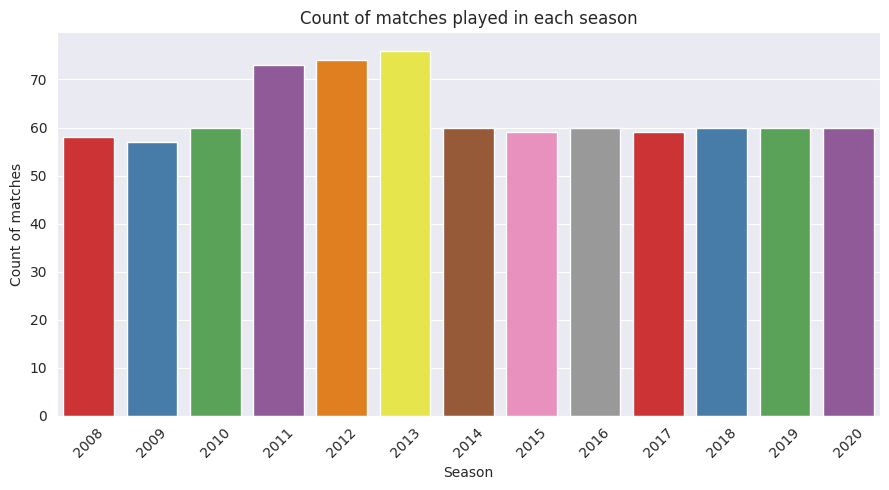

In [ ]:
plt.figure(figsize = (9, 5))
sns.barplot(x = matches_per_season.index, y = matches_per_season.values,palette='Set1')
plt.title('Count of matches played in each season')
plt.xlabel('Season')
plt.ylabel('Count of matches')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 2 :

**How many runs were scored in each season?**

# Solution
We have to calculate the total number of runs -->Sum of total runs
Inorder to get in each season we have to do a group by

In [ ]:
merged_df = balls_df.merge(matches_df[['id', 'season']], on = 'id')
runs_per_season = merged_df.groupby('season')['total_runs'].sum().sort_index()
runs_per_season.head(15)

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


# Let's Visualize the Total runs scored in each season

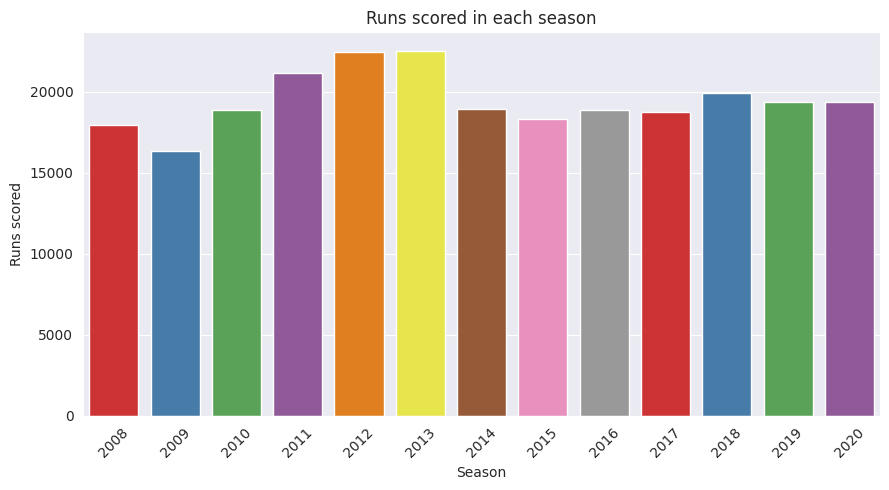

In [ ]:
plt.figure(figsize = (9, 5))
sns.barplot(x = runs_per_season.index, y = runs_per_season.values, palette='Set1')
plt.title('Runs scored in each season')
plt.xlabel('Season')
plt.ylabel('Runs scored')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 3 :

** What were the runs scored per match in different seasons?**

# Solution

We have already obtained matches per season and total runs per season.
So we have to divide them to obtain runs_per_match_season

In [ ]:
runs_per_match_season = runs_per_season / matches_per_season
runs_per_match_season.head(15)

,0
season,
2008,309.258621
2009,286.315789
2010,314.400000
2011,289.780822
2012,303.418919
2013,296.592105
2014,315.150000
2015,310.711864
2016,314.366667


# Let's visualize the runs scored per match in each season

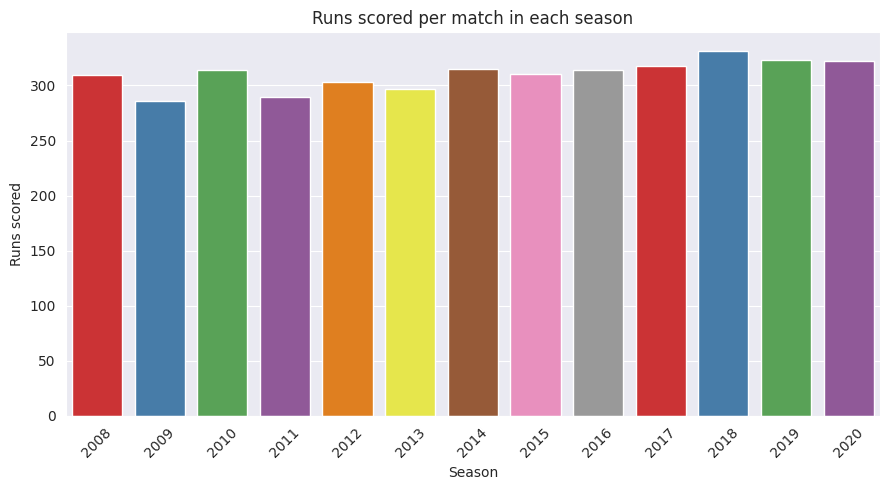

In [ ]:
plt.figure(figsize = (9, 5))
sns.barplot(x = runs_per_match_season.index, y = runs_per_match_season.values, palette='Set1')
plt.title('Runs scored per match in each season')
plt.xlabel('Season')
plt.ylabel('Runs scored')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 4 :

**Who has umpired the most?**

# Solution

To get the one who have umpired the most we have to take the count of the umpire from both umpire1 and umpire2 columns.

In [ ]:
umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()
umpires.head(1)

,count
S Ravi,121


In [ ]:
# Other option
umpires.idxmax()

'S Ravi'

# Question 5 :

**Which team has won the most tosses?**

# Solution

To identify the team with most tosses we have to count the toss winner.

In [ ]:
most_tosses_won = matches_df['toss_winner'].value_counts()
most_tosses_won.head(1)

,count
toss_winner,
Mumbai Indians,106


In [ ]:
# Alternatively
most_tosses_won.idxmax()

'Mumbai Indians'

# Question 6 :

**What does the team decide after winning the toss?**

# Solution

Post toss winning to identiy if the team bats or fields we can get it from toss decision column.

In [ ]:
toss_decision_count = matches_df['toss_decision'].value_counts()
toss_decision_count.head()

,count
toss_decision,
field,496
bat,320


# Question 7 :

**How does the toss decision vary across seasons?**

In [ ]:
toss_decision_by_season = matches_df.groupby(['season', 'toss_decision']).count().unstack().fillna(0)
toss_decision_by_season.head(20)

id       city       date       player_of_match       venue  \
toss_decision bat field  bat field  bat field             bat field   bat   
season                                                                      
2008           26    32   26    32   26    32              26    32    26   
2009           35    22   35    22   35    22              35    22    35   
2010           39    21   39    21   39    21              39    21    39   
2011           25    48   25    48   25    48              24    48    25   
2012           37    37   37    37   37    37              37    37    37   
2013           45    31   45    31   45    31              45    31    45   
2014           19    41   14    33   19    41              19    41    19   
2015           25    34   25    34   25    34              25    32    25   
2016           11    49   11    49   11    49              11    49    11   
2017           11    48   11    48   11    48              11    48    11   
2018           10    50   10    50   10    50              10    50    10   
2019           10    50   10    50   10    50              10    49    10   
2020           27    33   27    33   27    33              27    33    27   

                     ... result_margin       eliminator       method        \
toss_decision field  ...           bat field        bat field    bat field   
season               ...                                                     
2008             32  ...            26    32         26    32      2     0   
2009             22  ...            35    21         35    22      1     2   
2010             21  ...            39    20         39    21      0     0   
2011             48  ...            24    48         24    48      1     2   
2012             37  ...            37    37         37    37      0     0   
2013             31  ...            44    30         45    31      0     0   
2014             41  ...            18    41         19    41      0     1   
2015             34  ...            25    31         25    32      1     1   
2016             49  ...            11    49         11    49      1     3   
2017             48  ...            10    48         11    48      0     1   
2018             50  ...            10    50         10    50      0     3   
2019             50  ...             9    48         10    49      0     0   
2020             33  ...            26    30         27    33      0     0   

              umpire1       umpire2        
toss_decision     bat field     bat field  
season                                     
2008               26    32      26    32  
2009               35    22      35    22  
2010               39    21      39    21  
2011               25    48      25    48  
2012               37    37      37    37  
2013               45    31      45    31  
2014               19    41      19    41  
2015               25    34      25    34  
2016               11    49      11    49  
2017               11    48      11    48  
2018               10    50      10    50  
2019               10    50      10    50  
2020               27    33      27    33  

[13 rows x 32 columns]

*unstack() is a function used to pivot the data*
*It is primarily used in dataframes to have multiple index*


# Let's visualize the Toss decision variation across seasons

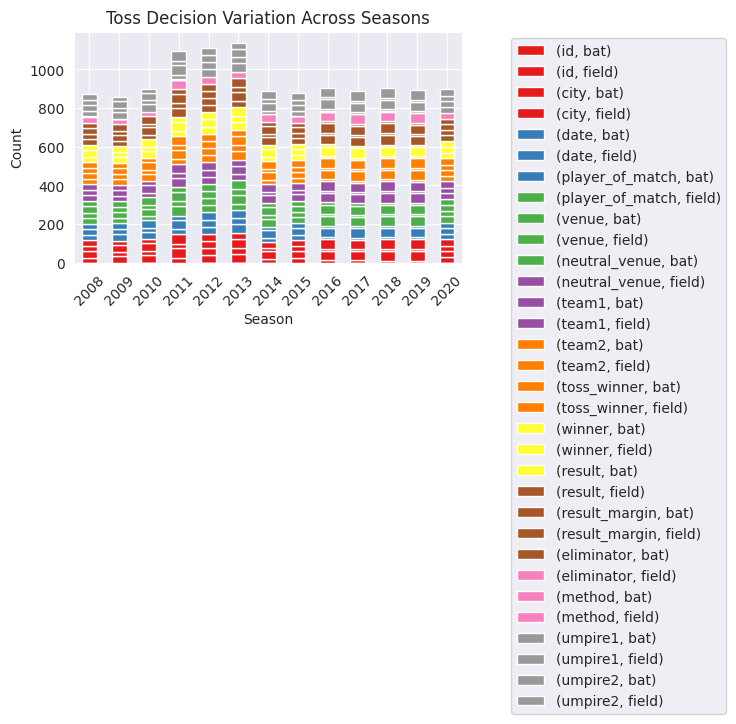

In [ ]:
toss_decision_by_season.plot(kind = 'bar', stacked = True, colormap = 'Set1')
plt.title('Toss Decision Variation Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right',bbox_to_anchor=(1.7, 1))
plt.show()

# Question 8 :

**Does winning the toss imply winning the game?**

# Solution
For this we have to check if winning toss is equal to being winner and find the win rate.

In [ ]:
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['winner'])
toss_win_match_win_rate = matches_df['toss_win_match_win'].mean()
print(toss_win_match_win_rate)

0.5122549019607843


# Let's visualize the toss win match win

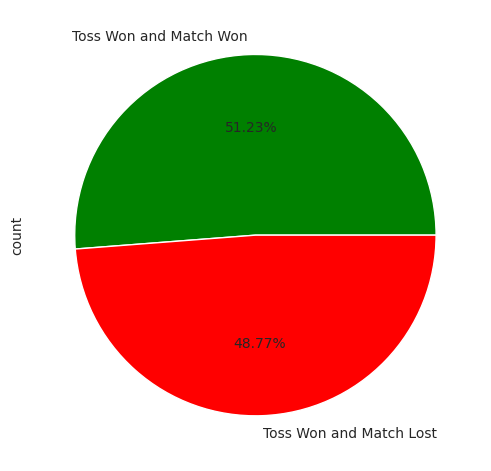

In [ ]:
plt.figure(figsize = (5, 5))
toss_outcome_counts = matches_df['toss_win_match_win'].value_counts()
toss_outcome_counts.index = ['Toss Won and Match Won', 'Toss Won and Match Lost']
toss_outcome_counts.plot(kind = 'pie', autopct = '%.2f%%', colors = ['g', 'r'])
plt.tight_layout()
plt.show()

# Question 9 :

**How many times has the chasing team won the match?**

# Solution
There would be 2 conditions for chasing team to win
1.If team wins the toss ,choose to field and wins
2.If team wins the toss ,chooses to bat and losses.

In [ ]:
matches_df.isnull().sum()

,0
id,0
city,13
date,0
player_of_match,4
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [ ]:
# Removing NA values
matches_df_clean = matches_df.dropna(subset=['winner', 'toss_winner', 'toss_decision'])

In [ ]:
chasing_win_condition = (
    ((matches_df_clean['toss_decision'] == 'field') & (matches_df_clean['toss_winner'] == matches_df_clean['winner'])) |
    ((matches_df_clean['toss_decision'] == 'bat') & (matches_df_clean['toss_winner'] != matches_df_clean['winner']))
)
print(chasing_win_condition.sum())

447


# Question 10 :

**Which all teams had won this tournament?**

# Solution

So, basically, we have to get the final match winner from each season
So first we have to sort the date to get the season and then remove duplicates to get unique winners

In [ ]:
final_matches = matches_df.sort_values('date').drop_duplicates('season', keep = 'last')
tournament_winners = final_matches['winner'].value_counts()
tournament_winners.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Sunrisers Hyderabad'],
      dtype='object', name='winner')

# Question 11 :

**Which team has played the most number of matches?**

# Solution

Just take the count of teams from team1 and team2

In [ ]:
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()
matches_played.head(1).index

Index(['Mumbai Indians'], dtype='object')

# Question 12 :

**Which team has won the most number of times?**

# Solution

Take the count of team from winners column

In [ ]:

most_wins = matches_df['winner'].value_counts()
most_wins.head(1).index

Index(['Mumbai Indians'], dtype='object', name='winner')

# Question 13 :

**Which team has the highest winning percentage?**

# Solution
Win%=(total_wins/total_matches)*100

In [ ]:
total_matches_team = matches_df['team1'].value_counts().sort_index()
wins_team = matches_df['winner'].value_counts().sort_index()
wins_percentage = (wins_team / total_matches_team) * 100
wins_percentage.idxmax()

'Mumbai Indians'

# Question 14 :

**Is there any lucky venue for a particular team?**

# Solution
First we have to filter venue based on the winner and find the win count,sort in descending order and then group by winner to get the lucky venue of each team.

In [ ]:
lucky_venues = matches_df.groupby(['winner', 'venue']).size().reset_index(name = 'win_count')
lucky_venues = lucky_venues.sort_values('win_count', ascending = False)
lucky_venues_per_team = lucky_venues.groupby('winner').first().sort_values(by = 'win_count', ascending = False).reset_index()
lucky_venues_per_team

,winner,venue,win_count
0,Kolkata Knight Riders,Eden Gardens,45
1,Mumbai Indians,Wankhede Stadium,42
2,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
3,Rajasthan Royals,Sawai Mansingh Stadium,32
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",30
5,Royal Challengers Bangalore,M Chinnaswamy Stadium,29
6,Delhi Daredevils,Feroz Shah Kotla,27
7,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",18
8,Rising Pune Supergiants,Maharashtra Cricket Association Stadium,5
9,Delhi Capitals,Dubai International Cricket Stadium,4


# Question 15 :

**Innings wise comparison between teams**

# Solution
to get the total runs per team in each inning,we need to group by batting team and inning and find the sum of total runs.

In [ ]:
innings_comparison = balls_df.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack()
innings_comparison

inning,1,2
batting_team,,
Chennai Super Kings,15344,13019
Deccan Chargers,6765,4698
Delhi Capitals,2860,2436
Delhi Daredevils,11247,13038
Gujarat Lions,2267,2589
Kings XI Punjab,15710,14307
Kochi Tuskers Kerala,1009,892
Kolkata Knight Riders,14842,14541
Mumbai Indians,18338,13948


# Question 16 :

Which team has scored the most number of 200+ scores?

# Solution

We have to find the total runs of the batting team per match who has scored 200+ runs.So we have to group by id,batting team and sum the total runs and filter total runs>=200 and findout the team with max 200+ runs.

In [ ]:
team_total_runs = balls_df.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
team_total_runs = team_total_runs[team_total_runs['total_runs'] >= 200]
team_total_runs['batting_team'].value_counts().idxmax()
#team_total_runs

'Royal Challengers Bangalore'

# Question 17 :

**Which team has conceded 200+ scores the most?**

# Solution

Similar to the above question,We have to find the total runs of the bowling team per match who has scored 200+ runs.So we have to group by id,bowling team and sum the total runs and filter total runs>=200 and findout the team with max 200+ runs.

In [ ]:

team_200plus_against = balls_df.groupby(['id', 'bowling_team'])['total_runs'].sum().reset_index()
team_200plus_against = team_200plus_against[team_200plus_against['total_runs'] >= 200]
team_200plus_against['bowling_team'].value_counts().idxmax()
#team_200plus_against

'Kings XI Punjab'

# Question 18 :

**What was the highest run scored by a team in a single match?**

# Solution

We have to find the total runs of the batting team per match who has scored highest runs.So we have to group by id,batting team and sum the total runs and sort the total runs in descending order and find the team with highest runs.

In [ ]:
team_total_runs = balls_df.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
highest_team_score = team_total_runs.sort_values('total_runs', ascending = False)['batting_team'].head(1)
highest_team_score.values[0]


'Royal Challengers Bangalore'

In [ ]:
# Alternatively
highest_team_score.value_counts().idxmax()

'Royal Challengers Bangalore'

# Question 19 :

**Which team has the biggest win in terms of run margin?**

# Solution
We have to filter the results for runs and sort the values by result margin in desending order to get the max value and then find the corresponding winner.

In [ ]:
biggest_run_margin_win = matches_df[matches_df['result'] == 'runs'].sort_values(by = 'result_margin', ascending = False)['winner']
biggest_run_margin_win.head(1).values

array(['Mumbai Indians'], dtype=object)

In [ ]:
# Alternatively
biggest_run_margin_win.value_counts().idxmax()

'Mumbai Indians'

# Question 20 :

**Which batsmen have played the most number of balls?**

# Solution

For the batsmen who played most balls we need to group by batsmen and then sort the values in descending order to get the player with most balls played.

In [ ]:
balls_played = balls_df['batsman'].value_counts()
balls_played.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

In [ ]:
# Alternatively
balls_played = balls_df.groupby('batsman').size().sort_values(ascending = False).head(1)
balls_played.index

Index(['V Kohli'], dtype='object', name='batsman')

In [ ]:
# ALternatively considering Excluding wide balls
balls_played = balls_df[balls_df['extra_runs'] == 0]['batsman'].value_counts()
balls_played.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

# Question 21 :

**Who are the leading run-scorers of all time?**

# Solution

Add the total runs scored by each batsmen and sort in descending order

In [ ]:

run_scorers = balls_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)
run_scorers.head(10)

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


# Let's visualize the Top 10 run scorers of all time.

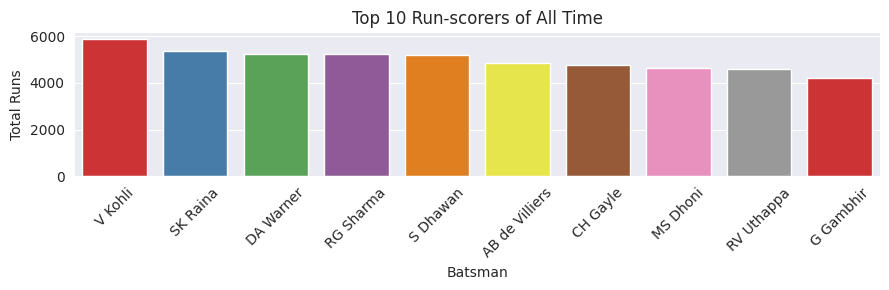

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = run_scorers.index[:10], y = run_scorers.values[:10],palette='Set1')
plt.title('Top 10 Run-scorers of All Time')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 22 :

**Who has hit the most number of 4's?**

# Solution

So either the batsmen hits 4 or no ball and 4 and non-boundary to be zero.If these conditions are met then we can find the batsmen with most 4's.

In [ ]:
fours = balls_df[((balls_df['batsman_runs'] == 4) | (balls_df['batsman_runs'] == 5)) & (balls_df['non_boundary'] == 0)].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)
fours.head(1).index

Index(['S Dhawan'], dtype='object', name='batsman')

# Let's visualize the Top 10 batsmen with most number of 4's

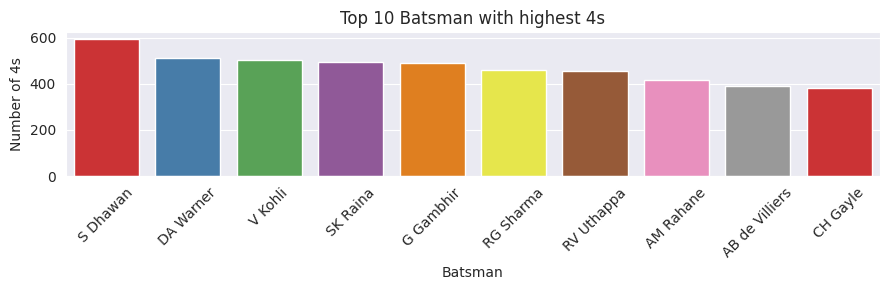

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = fours.index[:10], y = fours.values[:10],palette='Set1')
plt.title('Top 10 Batsman with highest 4s')
plt.xlabel('Batsman')
plt.ylabel('Number of 4s')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 23 :

**Who has hit the most number of 6's?**

# Solution

Either the batsmen hits 6 or no ball and 6.If these conditions are met then we can find the batsmen with most 6's.

In [ ]:
sixs = balls_df[(balls_df['batsman_runs'] >= 6)]['batsman'].value_counts()
sixs.head(1).index

Index(['CH Gayle'], dtype='object', name='batsman')

# Let's visualize the Top 10 batsman with most 6s

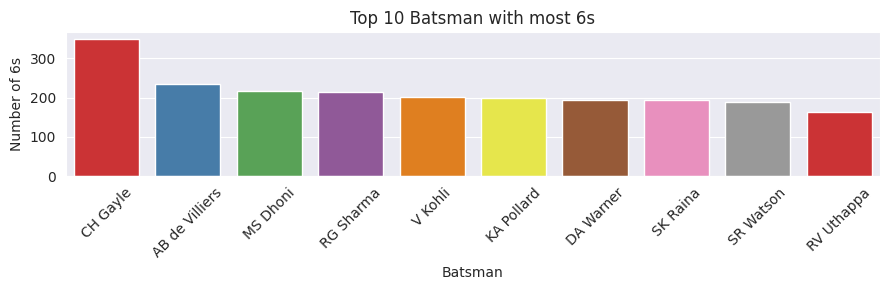

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = sixs.index[:10], y = sixs.values[:10],palette='Set1')
plt.title('Top 10 Batsman with most 6s')
plt.xlabel('Batsman')
plt.ylabel('Number of 6s')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 24 :

**Who has the highest strike rate?**

# Solution

strike_rate is (total runs scored by a batsman / number of balls faced) * 100

In [ ]:
balls = balls_df[balls_df['extra_runs'] == 0]
balls_faced = balls.groupby('batsman').size().sort_index()
total_runs = balls.groupby('batsman')['batsman_runs'].sum().sort_index()
strike_rate = (total_runs / balls_faced) * 100
strike_rate=strike_rate.sort_values(ascending = False).head()
strike_rate.head().index
strike_rate.idxmax()

'B Stanlake'

# Let's visualize the top 10 batsman with highest strike rate

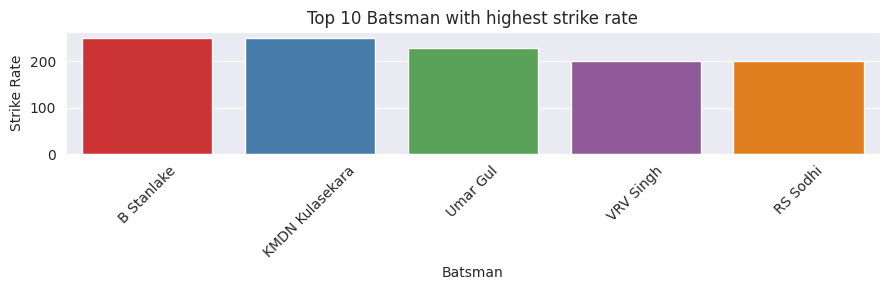

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = strike_rate.index[:5], y = strike_rate.values[:5],palette='Set1')
plt.title('Top 5 Batsman with highest strike rate')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Question 25 :

**Who is the leading wicket-taker?**

# Solution

We have to satisfy 2 conditions to find the leading wicket taker
1.Dismissal kind should not be run out
2.And the bowler has taken a wicket i.e. is_wicket should be 1 and then find the bowler with max wickets

In [ ]:
wickets_df = balls_df[(balls_df['is_wicket'] == 1) & (balls_df['dismissal_kind'] != 'run out')]
wickets_df['bowler'].value_counts().idxmax()

'SL Malinga'

# Let's visualize the Top 10 leading wicket takers

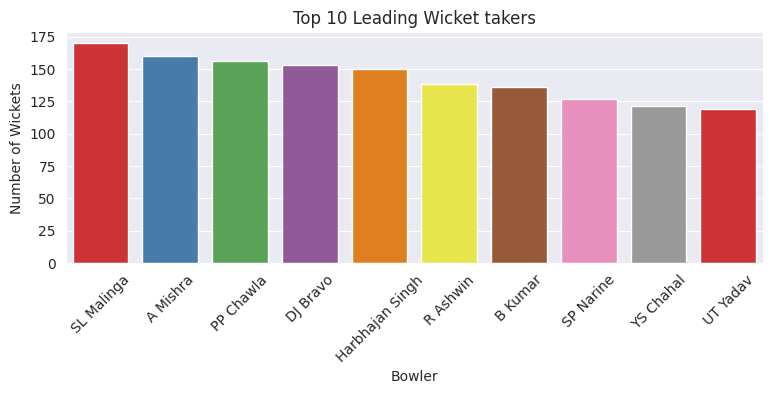

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = wickets_df['bowler'].value_counts().index[:10], y = wickets_df['bowler'].value_counts().values[:10],palette='Set1')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Leading Wicket takers')
plt.xticks(rotation = 45)
plt.show()

# Question 26 :

**Which stadium has hosted the most number of matches?**

# Solution

Filter the count by Venue to get the staidum with most matches

In [ ]:
matches_per_stadium = matches_df['venue'].value_counts()
matches_per_stadium.head(1).index

Index(['Eden Gardens'], dtype='object', name='venue')

In [ ]:
# Alternatively
matches_per_stadium.idxmax()

'Eden Gardens'

# Let's visualize the top 10 stadiums to host matches

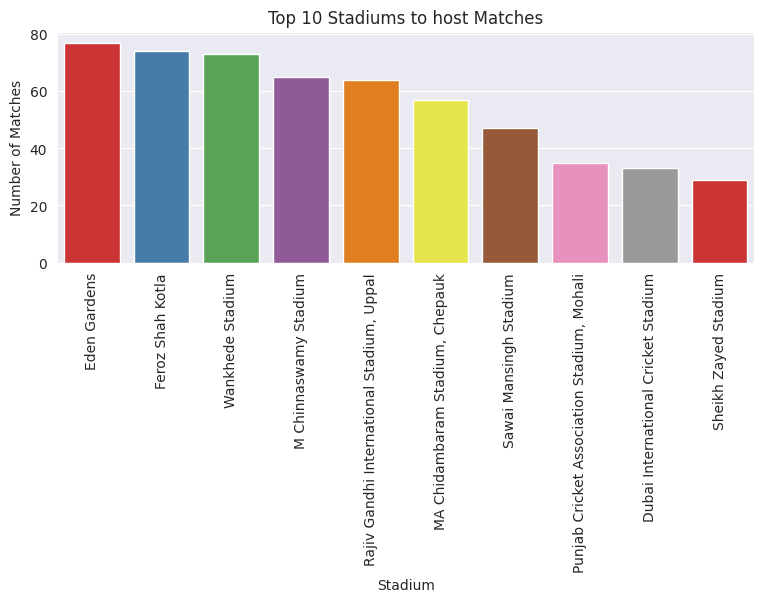

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = matches_per_stadium.index[:10], y = matches_per_stadium.values[:10],palette='Set1')
plt.xlabel('Stadium')
plt.ylabel('Number of Matches')
plt.xticks(rotation = 90)
plt.title('Top 10 Stadiums to host Matches')
plt.show()

# Question 27 :

**Who has won the most MOM awards?**

# Solution

Filter the player of match and take the count

In [ ]:
mom_awards = matches_df['player_of_match'].sort_index()
mom_awards.value_counts().idxmax()

'AB de Villiers'

In [ ]:
#Alternatively
mom_awards = matches_df['player_of_match'].value_counts()
mom_awards.head(1).index

Index(['AB de Villiers'], dtype='object', name='player_of_match')

# Let's visualize the Top 10 players with MOM award

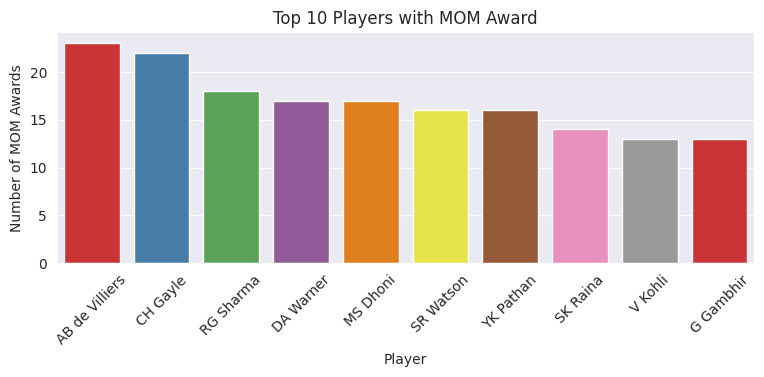

In [ ]:
# Plot for top 10 MOM awardees
plt.figure(figsize = (9, 3))
sns.barplot(x = mom_awards.index[:10], y = mom_awards.values[:10],palette='Set1')
plt.xlabel('Player')
plt.ylabel('Number of MOM Awards')
plt.xticks(rotation = 45)
plt.title('Top 10 Players with MOM Award')
plt.show()

# Question 28 :

**What is the count of fours hit in each season?**

# Solution

First we have to identify balls per season.Since ball details and season details are in different datasets so we have to merge them and then filter for 4 runs by batsman , then group by season and count the 4s

In [ ]:
balls_with_season = balls_df.merge(matches_df[['id', 'season']], on = 'id')
fours = balls_with_season[balls_with_season['batsman_runs'] == 4].groupby('season')['batsman_runs'].count()
fours

,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


# Let's visualize the Number of 4s hit in each season

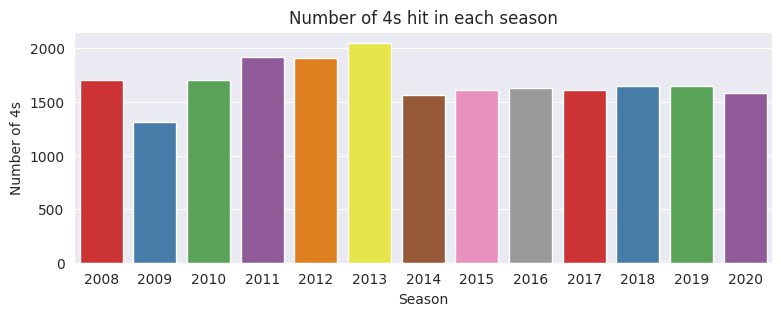

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = fours.index, y = fours.values,palette='Set1')
plt.xlabel('Season')
plt.ylabel('Number of 4s')
plt.title('Number of 4s hit in each season')
plt.show()

# Question 29 :

**What is the count of sixss hit in each season?**

# Solution

First we have to identify balls per season.Since ball details and season details are in different datasets so we have to merge them and then filter for 6 runs by batsman , then group by season and count the 6s

In [ ]:
balls_with_season = balls_df.merge(matches_df[['id', 'season']], on = 'id')
sixes = balls_with_season[balls_with_season['batsman_runs'] == 6].groupby('season')['batsman_runs'].count()
sixes

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


# Let's visualize the Number of 6s hit in each season

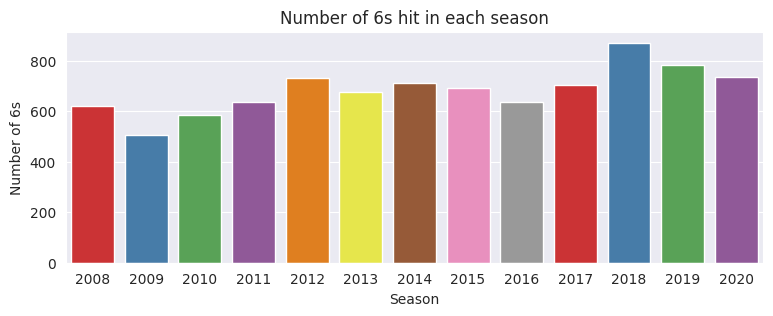

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = sixes.index, y = sixes.values,palette='Set1')
plt.xlabel('Season')
plt.ylabel('Number of 6s')
plt.title('Number of 6s hit in each season')
plt.show()

# Question 30 :

**What is the count of runs scored from boundaries in each season?**

# Solution

Already we know the balls with season and from boundaries i.e 4 and 6 only.Next we have to group by season and runs.

In [ ]:
boundaries = balls_with_season[(balls_with_season['batsman_runs'] == 4) | (balls_with_season['batsman_runs'] == 6)]
runs_from_boundaries = boundaries.groupby('season')['batsman_runs'].sum()
runs_from_boundaries

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


# Let's visualize the Runs scored from boundaries in each season

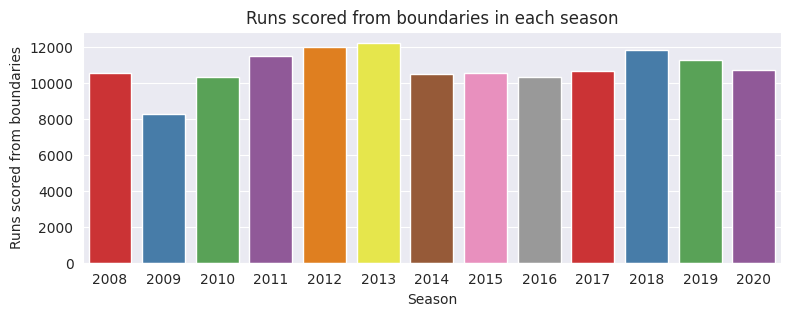

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = runs_from_boundaries.index, y = runs_from_boundaries.values,palette='Set1')
plt.xlabel('Season')
plt.ylabel('Runs scored from boundaries')
plt.title('Runs scored from boundaries in each season')
plt.show()

# Question 31 :

**What is the run contribution from boundaries in each season?**


# Solution

Already we know the balls with season and we need to get total runs from boundaries i.e 4 and 6 only.Next we have to obtain the contribution i.e.
(runs from boundaries*100)/total runs

In [ ]:
total_runs = balls_with_season.groupby('season')['batsman_runs'].sum()
run_contribution = (runs_from_boundaries / total_runs) * 100
run_contribution

,batsman_runs
season,
2008,62.763995
2009,54.118874
2010,58.314068
2011,57.697712
2012,56.474230
2013,57.208195
2014,58.765763
2015,60.773163
2016,57.710723


# Let's visualize the runs contributed from boundaries in each season

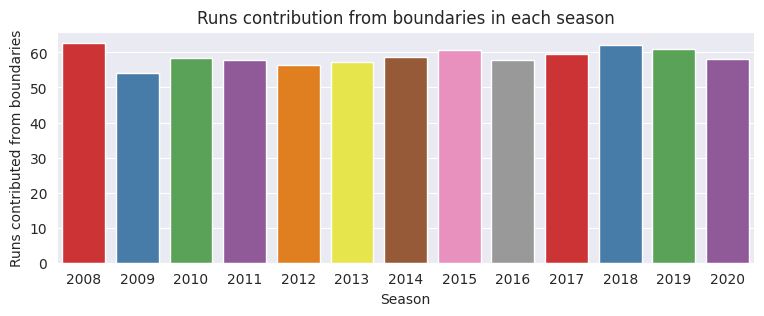

In [ ]:
plt.figure(figsize = (9, 3))
sns.barplot(x = run_contribution.index, y = run_contribution.values,palette='Set1')
plt.xlabel('Season')
plt.ylabel('Runs contributed from boundaries')
plt.title('Runs contribution from boundaries in each season')
plt.show()

# Question 32 :

**Which team has scored the most runs in the first 6 overs?**

# Solution

We have to filter overs <=6 ,inorder to obtain most runs group by batting team and sum the total runs

In [ ]:
powerplay_runs = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
powerplay_runs.idxmax()

'Mumbai Indians'

# Question 33 :

**Which team has scored the most runs in the last 4 overs?**

# Solution

We have to filter overs >=16 ,inorder to obtain most runs group by batting team and sum the total runs

In [ ]:
last_4_overs_runs = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum()
last_4_overs_runs.idxmax()

'Mumbai Indians'

# Question 34 :

**Which team has the best scoring run-rate in the first 6 overs?**

# Solution

First we have to filter overs <=6 and find the sum of total runs grouping the batting team.Since we have to find run rate for first 6 overs so  we shall divide by 6.

In [ ]:
powerplay_run_rate = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum() / 6
powerplay_run_rate.idxmax()

'Mumbai Indians'

# Question 35 :

**Which team has the best scoring run-rate in thelast 4 overs?**

# Solution

First we have to filter overs >=16 and find the sum of total runs grouping the batting team.Since we have to find run rate for last 4 overs we shall divide by 4.

In [ ]:
last_4_overs_run_rate = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum() / 4
last_4_overs_run_rate.idxmax()

'Mumbai Indians'